In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
path = 'mountain.jpeg'

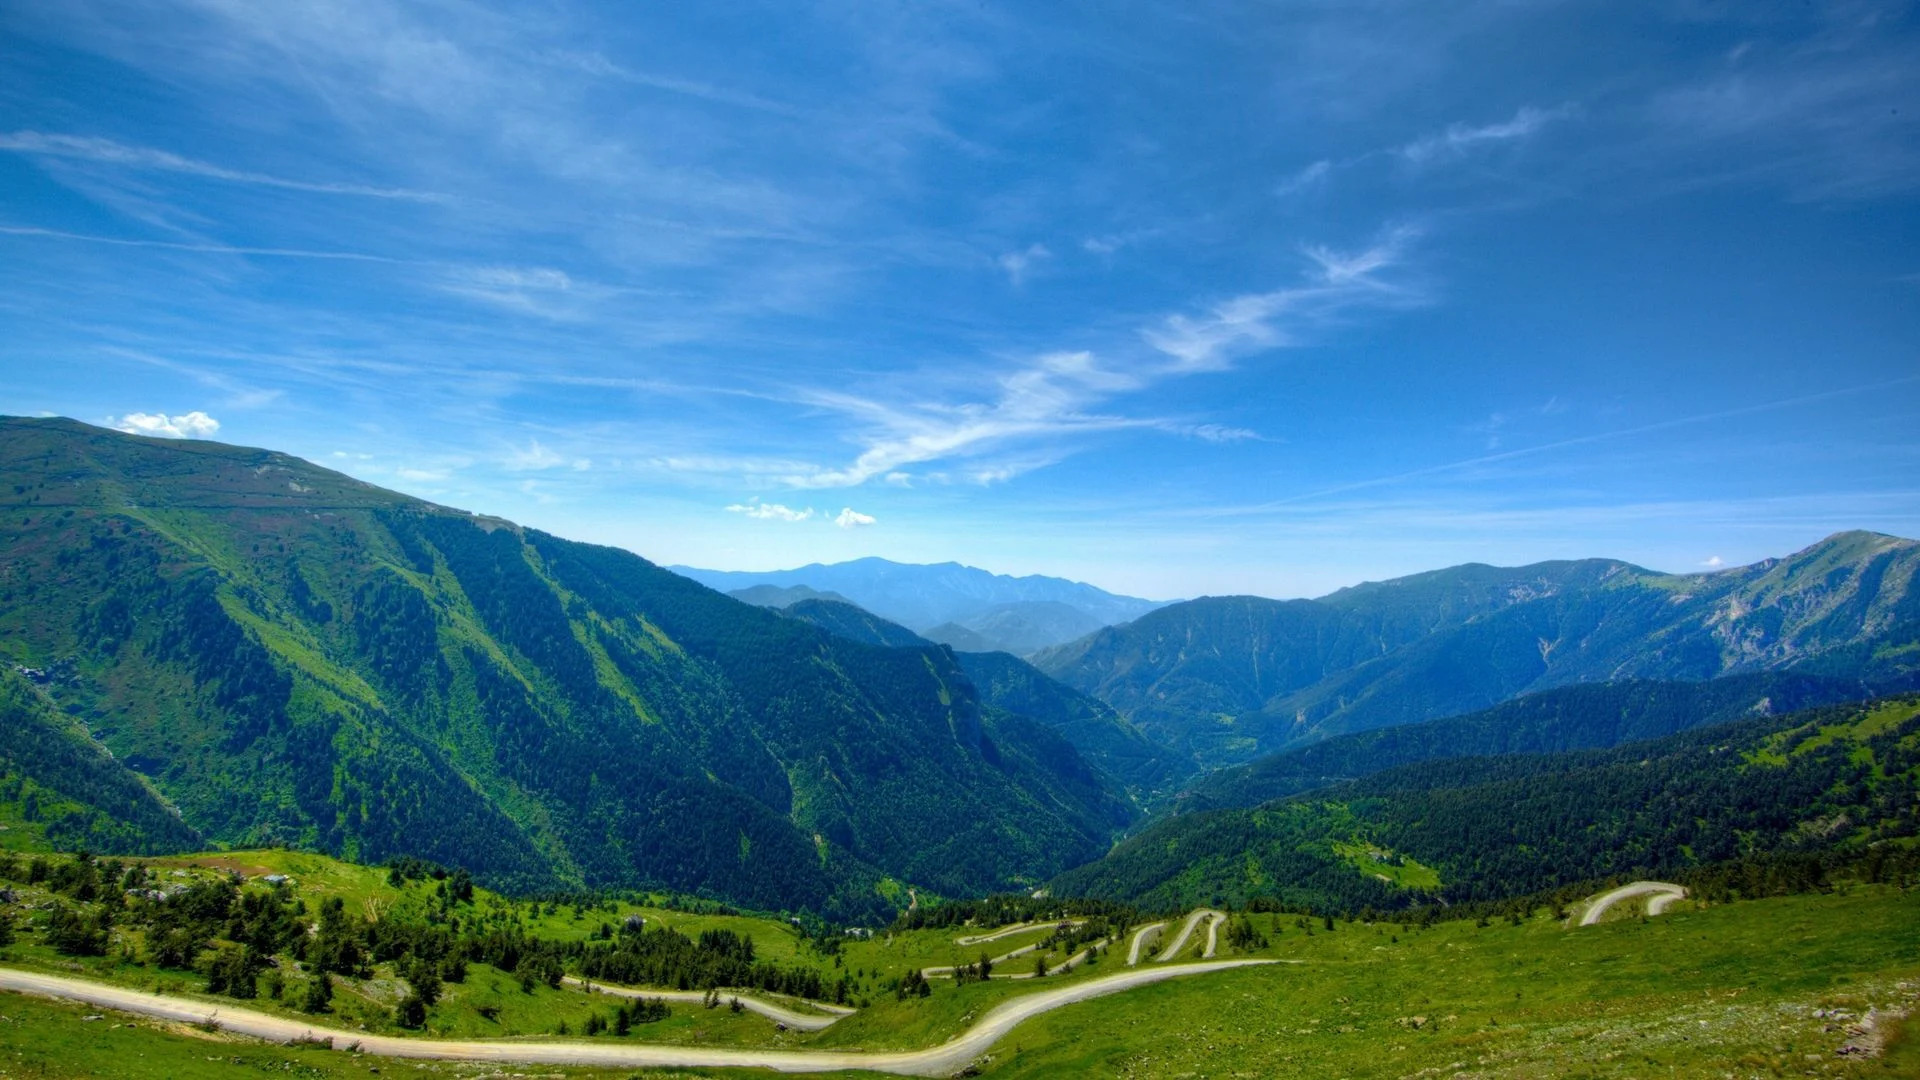

In [3]:
Image(path, height=500, width=700)

In [4]:
img = cv2.imread(path, cv2.IMREAD_UNCHANGED)

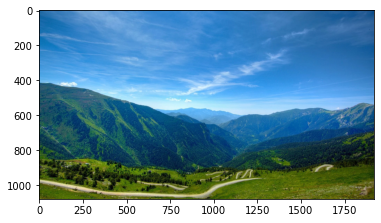

In [5]:
plt.imshow(img[:,:,::-1])

# Addition / Subtraction: Changes the Image Brightness

In [6]:
matrix = np.ones(img.shape, dtype='uint8') * 30

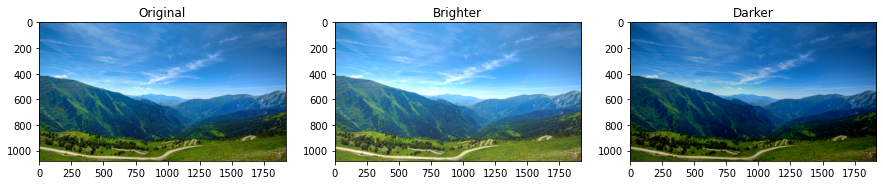

In [7]:
img_brighter = cv2.add(img, matrix)
img_darker = cv2.subtract(img, matrix)
plt.figure(figsize=(15, 8))
plt.subplot(131)
plt.imshow(img[:,:,::-1])
plt.title('Original')
plt.subplot(132)
plt.imshow(img_brighter[:,:,::-1])
plt.title('Brighter')
plt.subplot(133)
plt.imshow(img_darker[:,:,::-1])
plt.title('Darker')
plt.show()

# Multiplication: Changes the Image Contrast

In [8]:
matrix1 = np.ones(img.shape) * 0.8
matrix2 = np.ones(img.shape) * 1.2

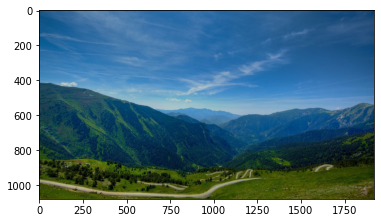

In [9]:
img_low_contrast = np.uint8(cv2.multiply(np.float64(img), matrix1, scale=1))
plt.imshow(img_low_contrast[:,:,::-1])

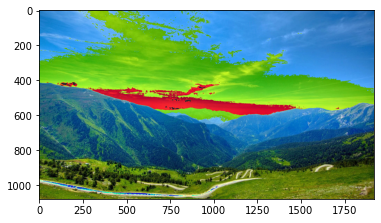

In [10]:
img_high_contrast = np.uint8(cv2.multiply(np.float64(img), matrix2))
plt.imshow(img_high_contrast[:,:,::-1])

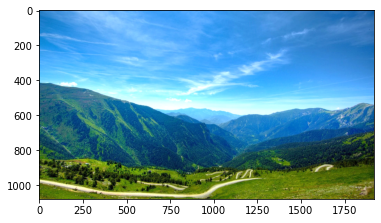

In [11]:
img_high_contrast_clip = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix2, scale=1), 0, 255))
plt.imshow(img_high_contrast_clip[:,:,::-1])

# Thresholding

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [13]:
plt.rcParams['image.cmap'] = 'gray'

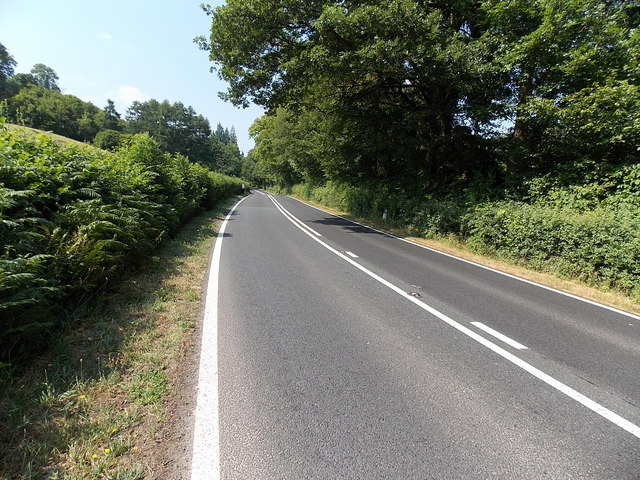

In [14]:
path = 'road_1.jpeg'
Image(path)

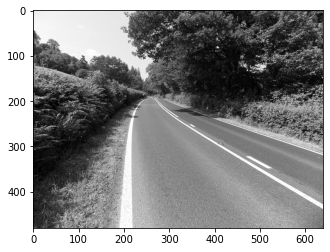

In [15]:
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

Text(0.5, 1.0, 'Thresholded')

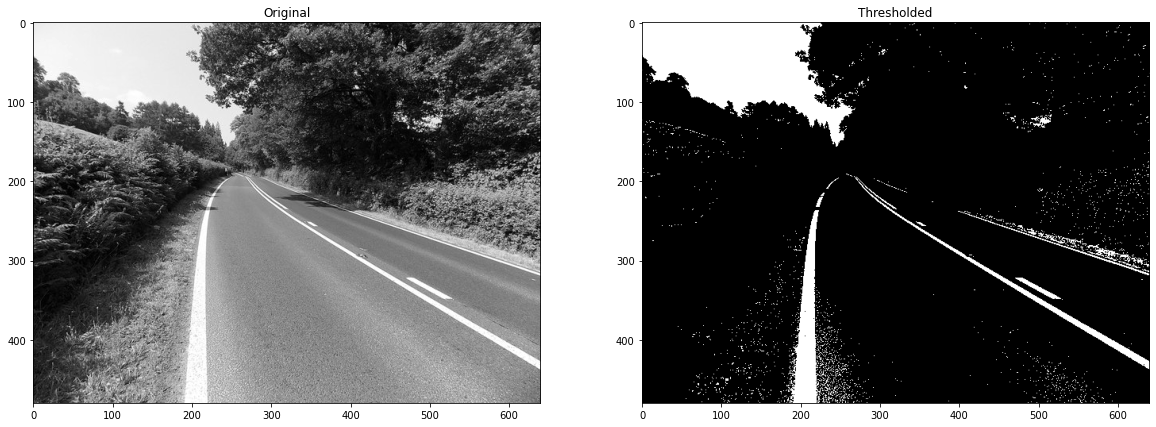

In [16]:
retval, binary_img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
# Display the images.
plt.figure(figsize = [20, 8])
plt.subplot(121); plt.imshow(img); plt.title('Original')
plt.subplot(122); plt.imshow(binary_img); plt.title('Thresholded')

In [17]:
img = cv2.imread('./starter_file/Sheet_Music_Test-1.jpg', cv2.IMREAD_GRAYSCALE)

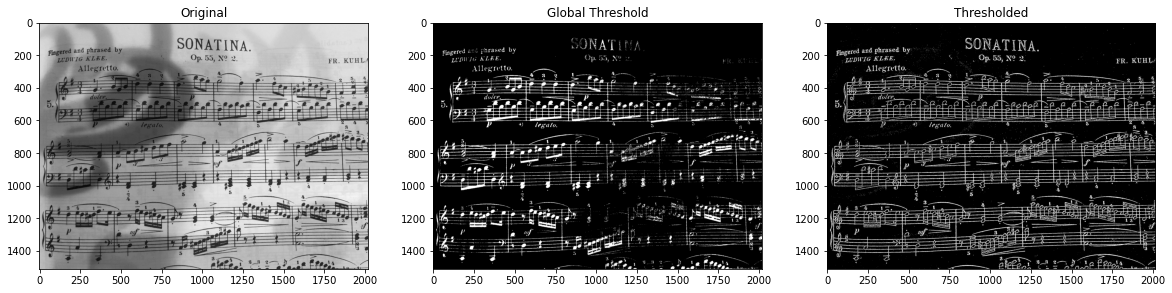

In [18]:
binary_img_1 =cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 9, 5)
retval, binary_img_2 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY_INV)
# Display the images.
plt.figure(figsize = [20, 8])
plt.subplot(131); plt.imshow(img); plt.title('Original')
plt.subplot(132); plt.imshow(binary_img_2); plt.title('Global Threshold')
plt.subplot(133); plt.imshow(binary_img_1); plt.title('Thresholded')
plt.show()

# Logical Operation 

In [19]:
path = './starter_file/'

yellow square:  (600, 600, 3)
gray circle:    (1000, 1000, 3)


Text(0.5, 1.0, 'Green Circle')

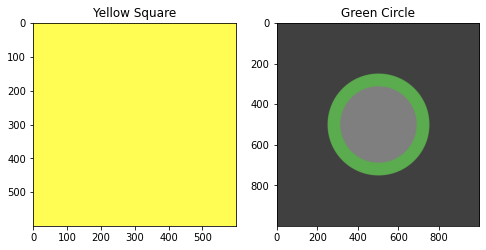

In [20]:
# Read the image of a yellow square ('yellow_square.png')
img_yellow_square = cv2.imread(path + 'yellow_square.png', cv2.IMREAD_COLOR)

# Read the image of a green/gray circle inside square.
img_green_circle = cv2.imread(path + 'green_circle.png', cv2.IMREAD_COLOR)

print('yellow square: ', img_yellow_square.shape)
print('gray circle:   ', img_green_circle.shape)

# Display both input images using matplotlib imshow().
plt.figure(figsize = (8, 8))
plt.subplot(121); plt.imshow(img_yellow_square[:, :, ::-1]); plt.title('Yellow Square')
plt.subplot(122); plt.imshow(img_green_circle);              plt.title('Green Circle')

In [21]:
img_green_circle.shape

(1000, 1000, 3)

In [22]:
dim = (img_green_circle.shape[1], img_green_circle.shape[0])

In [23]:
img_yellow_square_resized = cv2.resize(img_yellow_square, dim, interpolation=cv2.INTER_AREA)
img_yellow_square_resized.shape

(1000, 1000, 3)

In [24]:
plt.rcParams['image.cmap'] =  'gray'

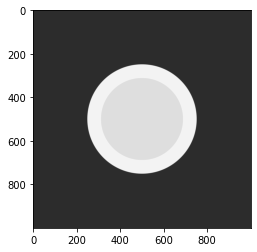

In [25]:
img_green_circle_gray = cv2.cvtColor(img_green_circle, cv2.COLOR_BGR2GRAY)
plt.imshow(img_green_circle_gray)

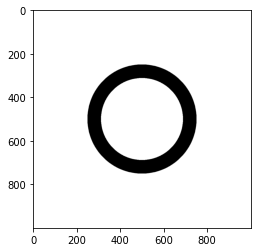

In [26]:
retVal, bin_img = cv2.threshold(img_green_circle_gray, 130, 255, cv2.THRESH_BINARY_INV)
plt.imshow(bin_img)

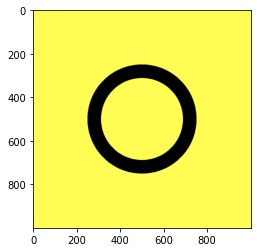

In [27]:
final_image = cv2.bitwise_and(img_yellow_square_resized, img_yellow_square_resized, mask=bin_img)
plt.imshow(final_image[:,:,::-1])

# Alpha channel

In [28]:
path = './starter_file/'

Text(0.5, 1.0, 'Grayscale')

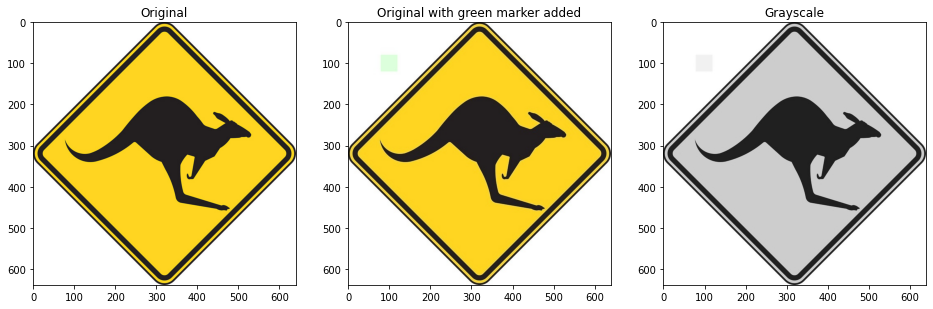

In [29]:
img_kang_org = cv2.imread(path + 'kangaroo.jpg',cv2.IMREAD_COLOR)
img_kang = cv2.imread(path + 'kangaroo_sign_with_green_marker.jpg',cv2.IMREAD_COLOR)
img_kang_gray = cv2.cvtColor(img_kang, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (16,10))
plt.subplot(131); plt.imshow(img_kang_org[:, :, ::-1]); plt.title('Original')
plt.subplot(132); plt.imshow(img_kang[:, :, ::-1]);     plt.title('Original with green marker added')
plt.subplot(133); plt.imshow(img_kang_gray);            plt.title('Grayscale')

In [ ]:
retval, bin_img = cv2.threshold(img_kang_gray, 225, 255, cv2.THRESH_BINARY_INV )
plt.imshow(bin_img)

In [ ]:
b,g,r = cv2.split(img_kang)
img_kang_alpha = cv2.merge([b, g, r, bin_img])
img_kang_alpha_rgb = cv2.cvtColor(img_kang_alpha, cv2.COLOR_BGRA2RGBA)
plt.imshow(img_kang_alpha_rgb)

In [ ]:
img_kang_alpha_rgb.shape